In [1]:
import os, sys

import django

PWD = os.getenv('PWD')
os.chdir(PWD)
sys.path.insert(0, os.getenv('PWD'))
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "netkeiba.settings")
os.environ.setdefault("REPLICA_DB_PATH", "/Users/henryehly/src/netkeiba/data_db_backups_2019-02-11T132640_db.sqlite3")
django.setup()

In [30]:
from django.db.models import Case, Value, When, F

from server.models import RaceContender

contenders = RaceContender.objects.using('replica').annotate(
    payoff=Case(
        When(order_of_finish=1, then=F('first_place_odds') * 100),
        default=Value(0)
    )
).values('payoff', 'horse__age', 'post_position')

import pandas as pd


df = pd.DataFrame(list(contenders))

2019-02-12 00:02:11 DEBUG    matplotlib.axes._base update_title_pos
2019-02-12 00:02:11 DEBUG    matplotlib.axes._base update_title_pos
2019-02-12 00:02:11 DEBUG    matplotlib.axes._base update_title_pos
2019-02-12 00:02:11 DEBUG    matplotlib.axes._base update_title_pos
2019-02-12 00:02:11 DEBUG    matplotlib.axes._base update_title_pos


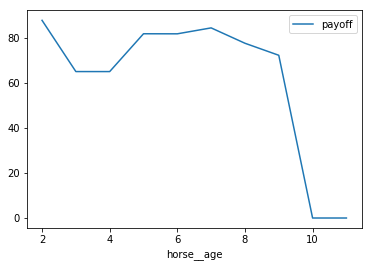

In [34]:
df[['payoff', 'horse__age']].groupby('horse__age').mean().plot()

2019-02-12 00:02:13 DEBUG    matplotlib.axes._base update_title_pos
2019-02-12 00:02:13 DEBUG    matplotlib.axes._base update_title_pos
2019-02-12 00:02:13 DEBUG    matplotlib.axes._base update_title_pos
2019-02-12 00:02:13 DEBUG    matplotlib.axes._base update_title_pos
2019-02-12 00:02:13 DEBUG    matplotlib.axes._base update_title_pos


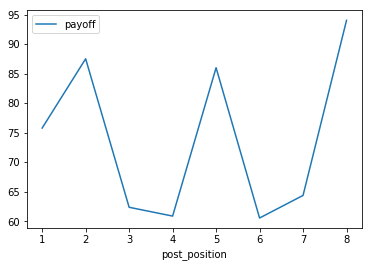

In [35]:
df[['payoff', 'post_position']].groupby('post_position').mean().plot()